In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('updated_metadata.csv')

df.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split,directory_path
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training,Processed_Images/48575a27b7c992427041a82fa750d...
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training,Processed_Images/48575a27b7c992427041a82fa750d...
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training,Processed_Images/75e8e48933289d70b407379a564f8...
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training,Processed_Images/75e8e48933289d70b407379a564f8...
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training,Processed_Images/c3487424fee1bdd4515b72dc3fd69...


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['breast_birads'] = label_encoder.fit_transform(df['breast_birads'])

df.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split,directory_path
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,3,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training,Processed_Images/48575a27b7c992427041a82fa750d...
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,3,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training,Processed_Images/48575a27b7c992427041a82fa750d...
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,2,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training,Processed_Images/75e8e48933289d70b407379a564f8...
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,2,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training,Processed_Images/75e8e48933289d70b407379a564f8...
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,3,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training,Processed_Images/c3487424fee1bdd4515b72dc3fd69...


In [5]:
!pip install imbalanced-learn

import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from transformers import AdamW, SwinForImageClassification, AutoFeatureExtractor
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [6]:
# Encode labels
label_encoder = LabelEncoder()
df['breast_birads'] = label_encoder.fit_transform(df['breast_birads'])

# Split data into features and labels
X = df[['directory_path']]
y = df['breast_birads']

# Define sampling strategies
oversample = RandomOverSampler(sampling_strategy={2: 4000, 3: 4000, 4: 4000})
undersample = RandomUnderSampler(sampling_strategy={0: 4000, 1: 4000})

# First, oversample minority classes
X_over, y_over = oversample.fit_resample(X, y)

# Then, undersample the majority class
X_balanced, y_balanced = undersample.fit_resample(X_over, y_over)

# Combine into a balanced DataFrame
balanced_df = pd.concat([X_balanced, y_balanced], axis=1)

# Check the distribution
print("Balanced class distribution:", Counter(y_balanced))

Balanced class distribution: Counter({0: 4000, 1: 4000, 2: 4000, 3: 4000, 4: 4000})


In [7]:
# Split the balanced dataset into training and testing sets
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['breast_birads'])

In [8]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define the ANN model
image_size = 64
ann_model = Sequential([
    Flatten(input_shape=(image_size, image_size, 3)),  # Flatten layer to convert 2D image data to 1D
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5 to prevent overfitting
    Dense(64, activation='relu'),  # Fully connected layer with 64 neurons and ReLU activation
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

C:\Users\shash\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,581,313 (6.03 MB)

 Trainable params: 1,581,313 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your neural network architecture
def create_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # Input layer
        layers.Dense(128, activation='relu'),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Example data (replace this with your actual data loading code)
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
val_images = val_images / 255.0

# Hyperparameters
epochs = 10
batch_size = 32

# Create and train the model
try:
    ann_model = create_model()
    ann_history = ann_model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_images, val_labels))
except Exception as e:
    print("An error occurred during training:", e)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8819 - loss: 0.4234 - val_accuracy: 0.9594 - val_loss: 0.1377
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9673 - loss: 0.1138 - val_accuracy: 0.9689 - val_loss: 0.1031
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9765 - loss: 0.0770 - val_accuracy: 0.9729 - val_loss: 0.0911
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9825 - loss: 0.0571 - val_accuracy: 0.9744 - val_loss: 0.0835
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9876 - loss: 0.0420 - val_accuracy: 0.9770 - val_loss: 0.0712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9906 - loss: 0.0324 - val_accuracy: 0.9784 - val_loss: 0.0726
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0243 - val_accuracy: 0.9787 - val_loss: 0.0752
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9942 - loss: 0.0205 

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions on the validation data
val_predictions = ann_model.predict(val_images)
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(val_labels, val_predictions_classes, average='weighted')
recall = recall_score(val_labels, val_predictions_classes, average='weighted')
f1 = f1_score(val_labels, val_predictions_classes, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
Precision: 0.9793212957309828
Recall: 0.9793
F1 Score: 0.9792985654225562


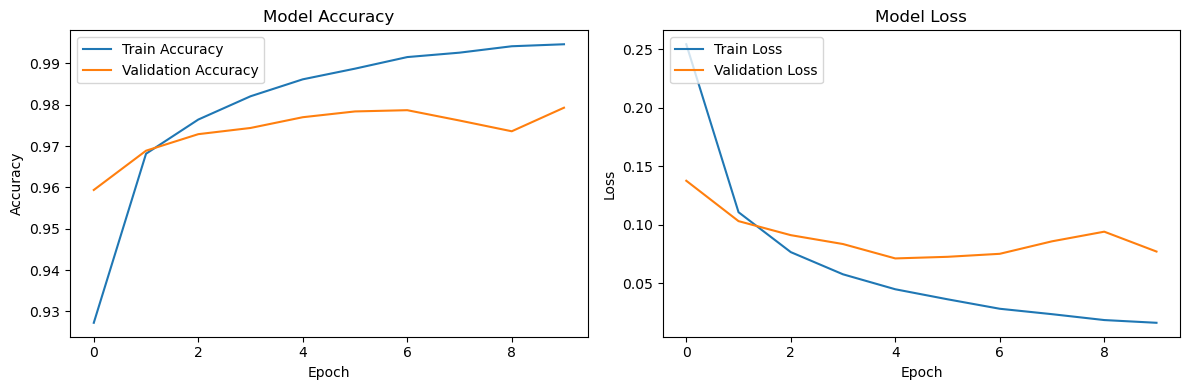

In [27]:
import matplotlib.pyplot as plt

# Function to plot training & validation accuracy and loss
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(ann_history)